In [1]:
import math
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#from itertools import cycle
#from sklearn.decomposition import PCA  
#from sklearn import preprocessing  
'''from sklearn.svm import *  
from sklearn.model_selection import StratifiedKFold, validation_curve, learning_curve, StratifiedShuffleSplit, GridSearchCV  
from sklearn.feature_selection import *  
from sklearn.linear_model import *  
from mrmr import *  
from sklearn import metrics  
from sklearn.metrics import confusion_matrix  
import sensor_ml_framework_containers as sml  
import pdb '''

    

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from scipy import interp

import csv
import pandas as pd
#from sklearn.model_selection import 

from pandas.tools.plotting import scatter_matrix


In [2]:
#matplotlib inline

In [3]:
fopen = open('C:\GIT-PERSONAL\OccupancyDetection\Data\datatraining.txt','r')

In [4]:
fopen.read()

'"date","Temperature","Humidity","Light","CO2","HumidityRatio","Occupancy"\n"1","2015-02-04 17:51:00",23.18,27.272,426,721.25,0.00479298817650529,1\n"2","2015-02-04 17:51:59",23.15,27.2675,429.5,714,0.00478344094931065,1\n"3","2015-02-04 17:53:00",23.15,27.245,426,713.5,0.00477946352442199,1\n"4","2015-02-04 17:54:00",23.15,27.2,426,708.25,0.00477150882608175,1\n"5","2015-02-04 17:55:00",23.1,27.2,426,704.5,0.00475699293331518,1\n"6","2015-02-04 17:55:59",23.1,27.2,419,701,0.00475699293331518,1\n"7","2015-02-04 17:57:00",23.1,27.2,419,701.666666666667,0.00475699293331518,1\n"8","2015-02-04 17:57:59",23.1,27.2,419,699,0.00475699293331518,1\n"9","2015-02-04 17:58:59",23.1,27.2,419,689.333333333333,0.00475699293331518,1\n"10","2015-02-04 18:00:00",23.075,27.175,419,688,0.00474535071966655,1\n"11","2015-02-04 18:01:00",23.075,27.15,419,690.25,0.00474095189694268,1\n"12","2015-02-04 18:02:00",23.1,27.1,419,691,0.00473937073052061,1\n"13","2015-02-04 18:03:00",23.1,27.1666666666667,419,683.5

In [5]:
data = pd.read_csv('C:\GIT-PERSONAL\OccupancyDetection\Data\datatraining.txt')
data_orig = pd.read_csv('C:\GIT-PERSONAL\OccupancyDetection\Data\datatraining.txt')
data_test = pd.read_csv('C:\GIT-PERSONAL\OccupancyDetection\Data\datatest.txt')
data_test2 = pd.read_csv('C:\GIT-PERSONAL\OccupancyDetection\Data\datatest2.txt')

In [6]:
plt.hist(data['Light'])

(array([  5.98600000e+03,   2.22000000e+02,   1.20200000e+03,
          7.13000000e+02,   1.70000000e+01,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([    0.        ,   154.63333333,   309.26666667,   463.9       ,
          618.53333333,   773.16666667,   927.8       ,  1082.43333333,
         1237.06666667,  1391.7       ,  1546.33333333]),
 <a list of 10 Patch objects>)

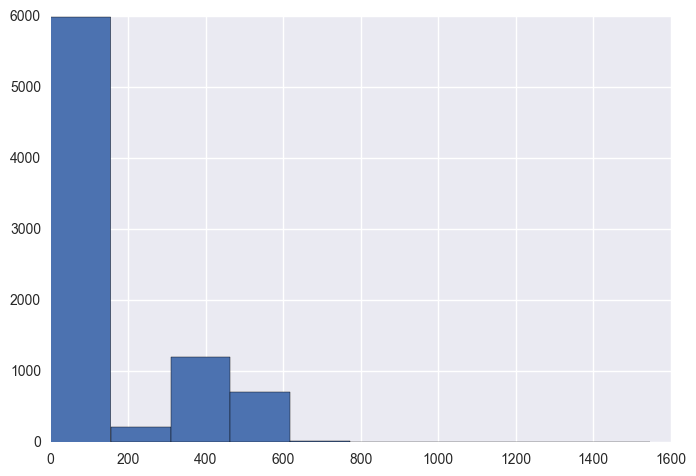

In [7]:
plt.show()

In [8]:
df = pd.DataFrame(data)

In [9]:
df['DayOfWeek'] = pd.to_datetime(df['date']).dt.dayofweek

In [10]:
df['DayOfWeek'] = pd.to_datetime(df['date']).dt.dayofweek

In [11]:
df['Hour'] = pd.to_datetime(df['date']).dt.hour

In [12]:
df['Month'] = pd.to_datetime(df['date']).dt.month

In [13]:
df_1 = df[df["Occupancy"]==1]

In [14]:
df_0 = df[df["Occupancy"]==0]

In [15]:
plt.hist(df_1['Humidity'])

(array([ 267.,  324.,  119.,  245.,  207.,   32.,   97.,  205.,   65.,  168.]),
 array([ 18.6    ,  20.65175,  22.7035 ,  24.75525,  26.807  ,  28.85875,
         30.9105 ,  32.96225,  35.014  ,  37.06575,  39.1175 ]),
 <a list of 10 Patch objects>)

In [16]:
plt.hist(df_0['Humidity'])

(array([  759.,  1289.,   317.,   431.,  1341.,   593.,   654.,   811.,
          130.,    89.]),
 array([ 16.745 ,  18.8395,  20.934 ,  23.0285,  25.123 ,  27.2175,
         29.312 ,  31.4065,  33.501 ,  35.5955,  37.69  ]),
 <a list of 10 Patch objects>)

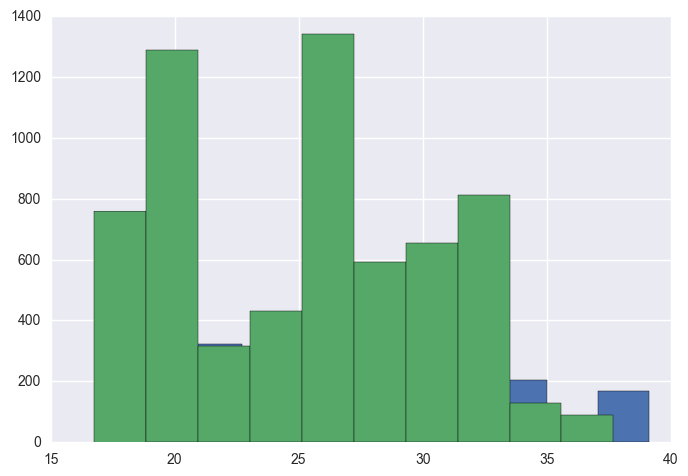

In [17]:
plt.show()

In [18]:
plt.hist(df_0['Temperature'])

(array([ 1184.,  1094.,   939.,  1308.,   626.,   532.,   244.,   140.,
          169.,   178.]),
 array([ 19.  ,  19.41,  19.82,  20.23,  20.64,  21.05,  21.46,  21.87,
         22.28,  22.69,  23.1 ]),
 <a list of 10 Patch objects>)

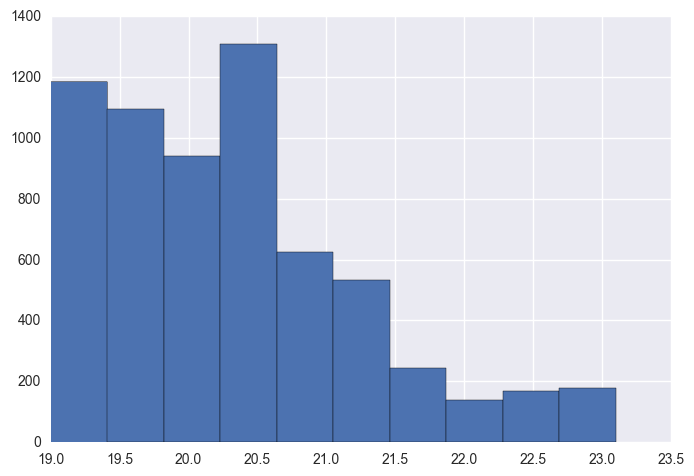

In [19]:
plt.show()

In [20]:
plt.hist(df_1['Temperature'])

(array([  18.,   27.,   64.,  149.,  208.,  338.,  339.,  471.,   96.,   19.]),
 array([ 19.5  ,  19.868,  20.236,  20.604,  20.972,  21.34 ,  21.708,
         22.076,  22.444,  22.812,  23.18 ]),
 <a list of 10 Patch objects>)

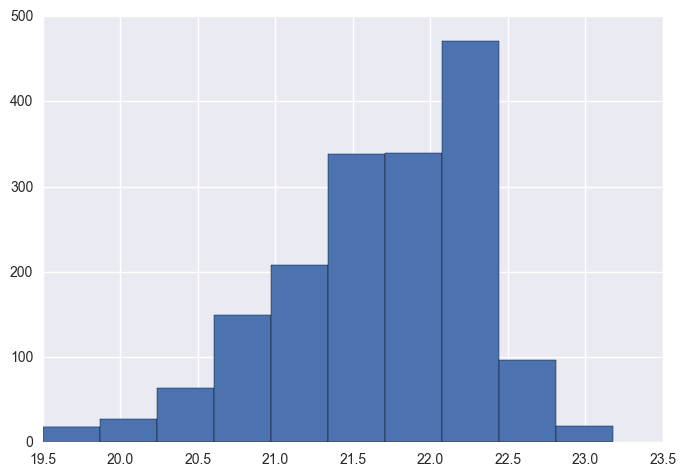

In [21]:
plt.show()

In [22]:
plt.hist(df_0['Light'])

(array([  5.98500000e+03,   2.18000000e+02,   1.56000000e+02,
          4.90000000e+01,   3.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([    0.        ,   154.63333333,   309.26666667,   463.9       ,
          618.53333333,   773.16666667,   927.8       ,  1082.43333333,
         1237.06666667,  1391.7       ,  1546.33333333]),
 <a list of 10 Patch objects>)

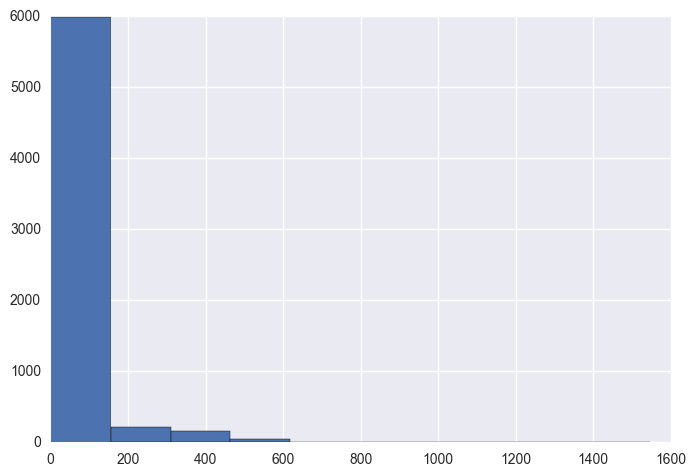

In [23]:
plt.show()

In [24]:
plt.hist(df_1['Light'])

(array([   1.,    0.,    2.,    2.,    6.,  965.,  658.,   79.,   10.,    6.]),
 array([  31. ,  102.3,  173.6,  244.9,  316.2,  387.5,  458.8,  530.1,
         601.4,  672.7,  744. ]),
 <a list of 10 Patch objects>)

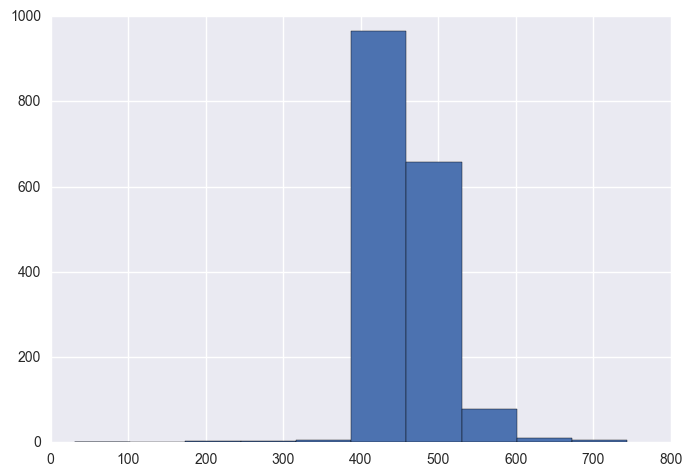

In [25]:
plt.show()

In [26]:
plt.hist(df_0['CO2'])

(array([ 5739.,   273.,   145.,    74.,    58.,    52.,    26.,    19.,
           13.,    15.]),
 array([  412.75 ,   549.925,   687.1  ,   824.275,   961.45 ,  1098.625,
         1235.8  ,  1372.975,  1510.15 ,  1647.325,  1784.5  ]),
 <a list of 10 Patch objects>)

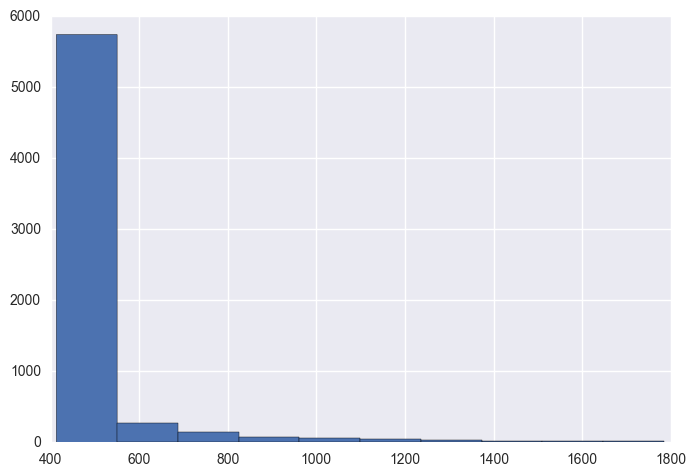

In [27]:
plt.show()

In [28]:
plt.hist(df_1['CO2'])

(array([ 125.,  197.,  494.,  332.,  198.,  102.,   91.,   21.,   55.,  114.]),
 array([  439.  ,   597.95,   756.9 ,   915.85,  1074.8 ,  1233.75,
         1392.7 ,  1551.65,  1710.6 ,  1869.55,  2028.5 ]),
 <a list of 10 Patch objects>)

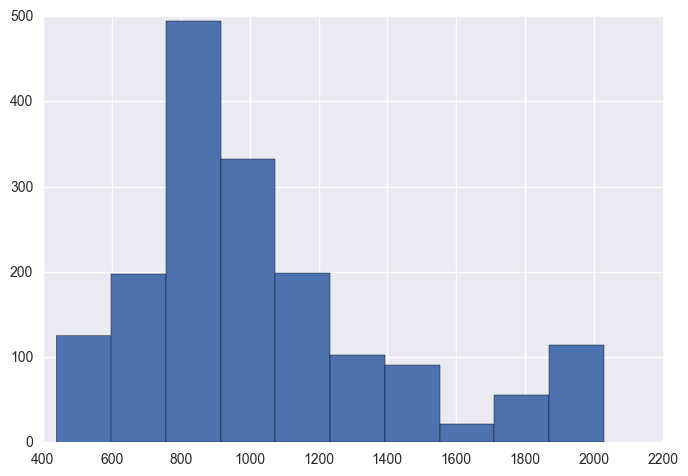

In [29]:
plt.show()

In [30]:
plt.hist(df_0['HumidityRatio'])

(array([ 1731.,   566.,   699.,  1356.,  1050.,   116.,   730.,    95.,
           43.,    28.]),
 array([ 0.00267413,  0.00302849,  0.00338285,  0.00373721,  0.00409157,
         0.00444593,  0.00480029,  0.00515465,  0.00550901,  0.00586336,
         0.00621772]),
 <a list of 10 Patch objects>)

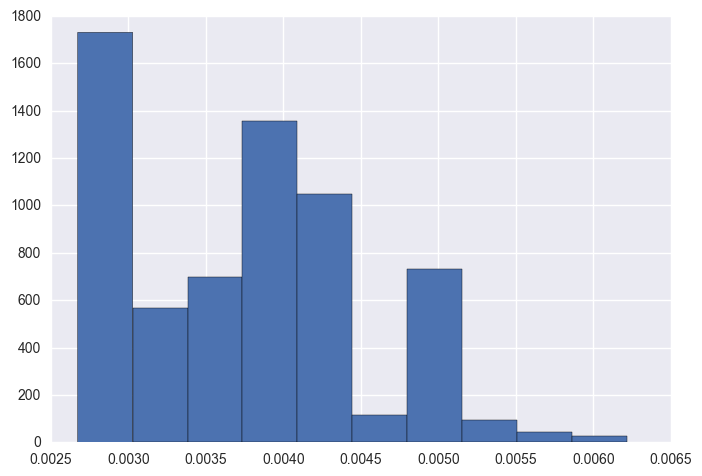

In [31]:
plt.show()

In [32]:
plt.hist(df_1['HumidityRatio'])

(array([ 126.,  360.,  178.,   97.,  348.,  150.,  173.,   95.,   43.,  159.]),
 array([ 0.00271536,  0.00309142,  0.00346749,  0.00384355,  0.00421962,
         0.00459569,  0.00497175,  0.00534782,  0.00572388,  0.00609995,
         0.00647601]),
 <a list of 10 Patch objects>)

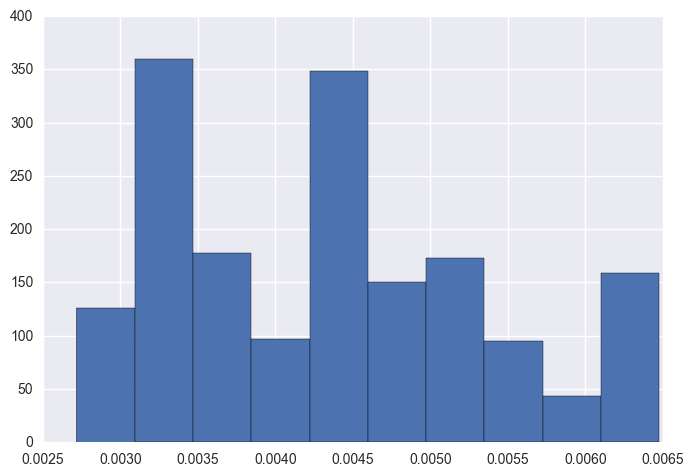

In [33]:
plt.show()

In [34]:
df_0.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,DayOfWeek,Hour,Month
count,6414.000000,6414.000000,6414.000000,6414.000000,6414.000000,6414.0,6414.000000,6414.000000,6414.0
mean,20.334931,25.349685,27.776442,490.320312,0.003730,0.0,3.614749,11.097443,2.0
std,0.909973,5.294887,89.598692,152.919609,0.000753,0.0,2.079694,7.803350,0.0
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.0,0.000000,0.000000,2.0
25%,19.500000,19.500000,0.000000,437.000000,0.003004,0.0,2.000000,4.000000,2.0
50%,20.200000,26.187500,0.000000,446.000000,0.003779,0.0,4.000000,10.000000,2.0
75%,20.890000,30.000000,0.000000,464.500000,0.004274,0.0,5.000000,19.000000,2.0
max,23.100000,37.690000,1546.333333,1784.500000,0.006218,0.0,6.000000,23.000000,2.0


In [35]:
df_1.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,DayOfWeek,Hour,Month
count,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000,1729.0,1729.000000,1729.000000,1729.0
mean,21.673192,27.147938,459.854347,1037.704786,0.004355,1.0,2.340659,12.478311,2.0
std,0.622891,6.128497,42.286862,377.603278,0.001006,0.0,1.679181,3.084219,0.0
min,19.500000,18.600000,31.000000,439.000000,0.002715,1.0,0.000000,7.000000,2.0
25%,21.290000,21.236000,433.000000,796.000000,0.003419,1.0,0.000000,10.000000,2.0
50%,21.767500,26.442500,454.000000,944.000000,0.004347,1.0,3.000000,12.000000,2.0
75%,22.100000,32.975000,477.750000,1131.250000,0.005107,1.0,4.000000,15.000000,2.0
max,23.180000,39.117500,744.000000,2028.500000,0.006476,1.0,4.000000,18.000000,2.0


In [36]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6414 entries, 17 to 8091
Data columns (total 10 columns):
date             6414 non-null object
Temperature      6414 non-null float64
Humidity         6414 non-null float64
Light            6414 non-null float64
CO2              6414 non-null float64
HumidityRatio    6414 non-null float64
Occupancy        6414 non-null int64
DayOfWeek        6414 non-null int64
Hour             6414 non-null int64
Month            6414 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 551.2+ KB


In [37]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729 entries, 1 to 8143
Data columns (total 10 columns):
date             1729 non-null object
Temperature      1729 non-null float64
Humidity         1729 non-null float64
Light            1729 non-null float64
CO2              1729 non-null float64
HumidityRatio    1729 non-null float64
Occupancy        1729 non-null int64
DayOfWeek        1729 non-null int64
Hour             1729 non-null int64
Month            1729 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 148.6+ KB


In [38]:
plt.scatter(df["Occupancy"], df["Temperature"])

In [39]:
plt.scatter(df["Occupancy"], df["Temperature"],label=str('Temperature'),s=120)

In [40]:
plt.scatter(df_1["Occupancy"], df_1["Temperature"],c='b',s=200,label='Occupied')
plt.scatter(df_0["Occupancy"], df_0["Temperature"],c='r',s=200,label='Empty')
plt.legend()

In [41]:
plt.scatter(df_1["Occupancy"], df_1["Humidity"],c='b',s=200,label='Occupied')
plt.scatter(df_0["Occupancy"], df_0["Humidity"],c='r',s=200,label='Empty')
plt.legend()

In [42]:
plt.scatter(df_1["Light"], df_1["CO2"],c='b',s=150,label='Occupied')
plt.scatter(df_0["Light"], df_0["CO2"],c='r',s=50,label='Empty')
plt.legend()

In [43]:
df.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,DayOfWeek,Hour,Month
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1,2,17,2
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1,2,17,2
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1,2,17,2
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1,2,17,2
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1,2,17,2


In [44]:
df.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,DayOfWeek,Hour,Month
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1,1,9,2
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1,1,9,2
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1,1,9,2
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1,1,9,2
8143,2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1,1,9,2


In [45]:
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy,DayOfWeek,Hour,Month
1,2015-02-04 17:51:00,23.180000,27.272000,426.0,721.250000,0.004793,1,2,17,2
2,2015-02-04 17:51:59,23.150000,27.267500,429.5,714.000000,0.004783,1,2,17,2
3,2015-02-04 17:53:00,23.150000,27.245000,426.0,713.500000,0.004779,1,2,17,2
4,2015-02-04 17:54:00,23.150000,27.200000,426.0,708.250000,0.004772,1,2,17,2
5,2015-02-04 17:55:00,23.100000,27.200000,426.0,704.500000,0.004757,1,2,17,2
6,2015-02-04 17:55:59,23.100000,27.200000,419.0,701.000000,0.004757,1,2,17,2
7,2015-02-04 17:57:00,23.100000,27.200000,419.0,701.666667,0.004757,1,2,17,2
8,2015-02-04 17:57:59,23.100000,27.200000,419.0,699.000000,0.004757,1,2,17,2
9,2015-02-04 17:58:59,23.100000,27.200000,419.0,689.333333,0.004757,1,2,17,2
10,2015-02-04 18:00:00,23.075000,27.175000,419.0,688.000000,0.004745,1,2,18,2


In [46]:
plt.hist(df_1['DayOfWeek'])

(array([ 534.,    0.,   54.,    0.,    0.,   16.,    0.,  539.,    0.,  586.]),
 array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]),
 <a list of 10 Patch objects>)

In [47]:
plt.hist(df_0['DayOfWeek'])

(array([  906.,   520.,     0.,   353.,     0.,   901.,   854.,     0.,
         1440.,  1440.]),
 array([ 0. ,  0.6,  1.2,  1.8,  2.4,  3. ,  3.6,  4.2,  4.8,  5.4,  6. ]),
 <a list of 10 Patch objects>)

In [48]:
plt.hist(df_1['Hour'])

(array([ 182.,  214.,  179.,  173.,  159.,   83.,  166.,  180.,  183.,  210.]),
 array([  7. ,   8.1,   9.2,  10.3,  11.4,  12.5,  13.6,  14.7,  15.8,
         16.9,  18. ]),
 <a list of 10 Patch objects>)

In [49]:
plt.hist(df_0['Hour'])

(array([ 1080.,   726.,   714.,   658.,   248.,   363.,   371.,   454.,
          720.,  1080.]),
 array([  0. ,   2.3,   4.6,   6.9,   9.2,  11.5,  13.8,  16.1,  18.4,
         20.7,  23. ]),
 <a list of 10 Patch objects>)

In [50]:
plt.hist(df_1['Month'])

(array([    0.,     0.,     0.,     0.,     0.,  1729.,     0.,     0.,
            0.,     0.]),
 array([ 1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5]),
 <a list of 10 Patch objects>)

In [51]:
plt.hist(df_0['Month'])

(array([    0.,     0.,     0.,     0.,     0.,  6414.,     0.,     0.,
            0.,     0.]),
 array([ 1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5]),
 <a list of 10 Patch objects>)

In [52]:
plt.scatter(df_1["DayOfWeek"], df_1["Hour"],c='b',s=150,label='Occupied')
plt.scatter(df_0["DayOfWeek"], df_0["Hour"],c='r',s=50,label='Empty')
plt.legend()

In [53]:
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds,verbose=1)
    gs.fit(Xtrain, ytrain)
    print("BEST PARAMS", gs.best_params_)
    best = gs.best_estimator_
    return best

In [54]:

def do_classify(clf, parameters, indf, featurenames, targetname, target1val, standardize=False, train_size=0.8):
    subdf=indf[featurenames]
    print("Seeing here:",subdf)
    if standardize:
        subdfstd=(subdf - subdf.mean())/subdf.std()
    else:
        subdfstd=subdf
    X=subdfstd.values
    print("X",X)
    y=(indf[targetname].values==target1val)*1
    print("y",indf[targetname])
    print(y[y>0])
    print(np.shape(y))
    print(np.shape(X))
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size)
    #print(Xtrain)
    plt.scatter(y,X[:,1])
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print("Accuracy on training data: %0.2f" % (training_accuracy))
    print("Accuracy on test data:     %0.2f" % (test_accuracy))
    return clf, Xtrain, ytrain, Xtest, ytest

In [55]:

clf_l, Xtrain_l, ytrain_l, Xtest_l, ytest_l  = do_classify(LogisticRegression(), 
                                                          {"C": [0.001, 0.1, 1, 10, 100]}, 
                                                          df, ['Temperature', 'Humidity','Light','CO2','HumidityRatio','DayOfWeek','Hour','Month'], 'Occupancy',1)



print(np.shape(Xtrain_l))
print(np.shape(ytrain_l))
print(np.shape(Xtest_l))
print(np.shape(ytest_l))

Seeing here:       Temperature   Humidity  Light         CO2  HumidityRatio  DayOfWeek  \
1       23.180000  27.272000  426.0  721.250000       0.004793          2   
2       23.150000  27.267500  429.5  714.000000       0.004783          2   
3       23.150000  27.245000  426.0  713.500000       0.004779          2   
4       23.150000  27.200000  426.0  708.250000       0.004772          2   
5       23.100000  27.200000  426.0  704.500000       0.004757          2   
6       23.100000  27.200000  419.0  701.000000       0.004757          2   
7       23.100000  27.200000  419.0  701.666667       0.004757          2   
8       23.100000  27.200000  419.0  699.000000       0.004757          2   
9       23.100000  27.200000  419.0  689.333333       0.004757          2   
10      23.075000  27.175000  419.0  688.000000       0.004745          2   
11      23.075000  27.150000  419.0  690.250000       0.004741          2   
12      23.100000  27.100000  419.0  691.000000       0.004739 

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s finished


In [56]:

scatter_matrix(df[['Temperature', 'Humidity','Light','Occupancy']], alpha=0.2, figsize=(20, 20), diagonal='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E8B5EB8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F5627F0>]], dtype=object)

In [57]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve

def func_standardize(input_df):
    standardized_df = (input_df - input_df.mean())/input_df.std()
    return(standardized_df)

def func_extract_feats(input_df, featurenames, standardize=False):
    subdf = input_df[featurenames]
    if standardize:
        subdfstd = func_standardize(input_df)
    else:
        subdfstd = input_df
    selected_feats = subdfstd.values
    return(selected_feats)

def func_feat_preprocessing(input_df):
    print(input_df.info())
    print()
    print(input_df.describe())
    print()
    
    # Converting timestamp feature to hour/day/month features
    input_df['Hour'] = pd.to_datetime(input_df['date']).dt.hour
    input_df['DayOfWeek'] = pd.to_datetime(input_df['date']).dt.dayofweek
    input_df['Month'] = pd.to_datetime(input_df['date']).dt.month
    # Converting any feature units
    
    # Plotting the scatterplot
    fig = sns.pairplot(input_df,palette="husl")
    fname='feature_matrix.jpg'
    fig.savefig(fname)
    return(input_df)

def func_train_test_split(input_df, featurenames, targetnames, train_percent):
    Xtrain, Xtest, Ytrain, Ytest = train_test_split(input_df[featurenames].values, input_df[targetnames].values, train_size=train_percent)
    return Xtrain, Xtest, Ytrain, Ytest

def func_build_model(chosen_classifier, parameters, Xtrain, Ytrain):
    clf = chosen_classifier(C=parameters)
    clf.fit(Xtrain, Ytrain)
    return clf

def func_apply_model(chosen_classifier_obj, Xtest):
    Y_predicted = chosen_classifier_obj.predict(Xtest)
    Y_predicted_probs = chosen_classifier_obj.predict_proba(Xtest)
    return Y_predicted, Y_predicted_probs

def func_evaluate_model(Y_predicted,Y_true,print_string):
    target_names = ['Male', 'Female', 'class 2']
    print(classification_report(Y_true, Y_predicted))
    print(confusion_matrix(Y_true, Y_predicted))
    f = open('performance_summary', 'a')
    print('\n')
    f.write(print_string + '\n')
    f.write(classification_report(Y_true, Y_predicted))
    f.write(str(confusion_matrix(Y_true, Y_predicted)))
    f.close()

def func_balance_classes(input_df, featurenames, targetnames, balancing_method):
    if(balancing_method == 'upsampling'): 
        class_frequencies = df['Occupancy'].value_counts()
        print(class_frequencies)
        if(class_frequencies[0]-class_frequencies[1]>0):
            missing_fraction = (class_frequencies[0]-class_frequencies[1])/(class_frequencies[1])
        else:
            missing_fraction = (class_frequencies[1]-class_frequencies[0])/(class_frequencies[0])
   
        print(missing_fraction)

        resampled_df = df[df['Occupancy']==1].sample(frac=missing_fraction, replace=True)
        resampled_df.head()

        frames = [df, resampled_df]
        final_df = pd.concat(frames)

        print('df:',len(df))
        print('finaldf',len(final_df))
        print('df0',sum(df['Occupancy']==0))
        print('df1',sum(df['Occupancy']==1))
        final_df.tail()
        print('finaldf0',sum(final_df['Occupancy']==0))
        print('finaldf1',sum(final_df['Occupancy']==1))
        return final_df
    if(balancing_method == 'downsampling'): 
        print("now here")
        
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import validation_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
   
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

def plot_binary_ROC_curve(estimator,n_classes,Xtest, Ytest):

    y_score = estimator.decision_function(Xtest)

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(Ytest, y_score)
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(Ytest.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    if n_classes==2:
        plt.figure()
        lw = 1
        plt.plot(fpr[1], tpr[1], color='darkorange',
           lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()
    else:
        # Check example first, binarization etc needed
        # First aggregate all false positive rates
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

        # Then interpolate all ROC curves at this points
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(n_classes):
            mean_tpr += interp(all_fpr, fpr[i], tpr[i])

        # Finally average it and compute AUC
        mean_tpr /= n_classes

        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        # Plot all ROC curves
        plt.figure()
        plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

        colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
        for i, color in zip(range(n_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Some extension of Receiver operating characteristic to multi-class')
        plt.legend(loc="lower right")
        plt.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 10 columns):
date             8143 non-null object
Temperature      8143 non-null float64
Humidity         8143 non-null float64
Light            8143 non-null float64
CO2              8143 non-null float64
HumidityRatio    8143 non-null float64
Occupancy        8143 non-null int64
DayOfWeek        8143 non-null int64
Hour             8143 non-null int64
Month            8143 non-null int64
dtypes: float64(5), int64(4), object(1)
memory usage: 699.8+ KB
None

       Temperature     Humidity        Light          CO2  HumidityRatio  \
count  8143.000000  8143.000000  8143.000000  8143.000000    8143.000000   
mean     20.619084    25.731507   119.519375   606.546243       0.003863   
std       1.016916     5.531211   194.755805   314.320877       0.000852   
min      19.000000    16.745000     0.000000   412.750000       0.002674   
25%      19.700000    20.200000     0.000000   439.000000     

C:\Program Files\Anaconda2\envs\py35\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


        Temperature      Humidity         Light           CO2  HumidityRatio  \
count  12417.000000  12417.000000  12417.000000  12417.000000   12417.000000   
mean      21.094510     28.917947    138.125947    745.644624       0.004468   
std        1.037511      4.125142    219.801233    296.497310       0.000595   
min       19.500000     21.865000      0.000000    427.500000       0.003275   
25%       20.390000     25.390000      0.000000    527.500000       0.003988   
50%       20.790000     28.600000      0.000000    632.000000       0.004511   
75%       21.675000     31.790000    392.000000    857.000000       0.004942   
max       24.408333     39.500000   1697.250000   2076.500000       0.005769   

          Occupancy  
count  12417.000000  
mean       0.243295  
std        0.429089  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  


 Balanced:
             precision    recall  f1-score   support

          0   

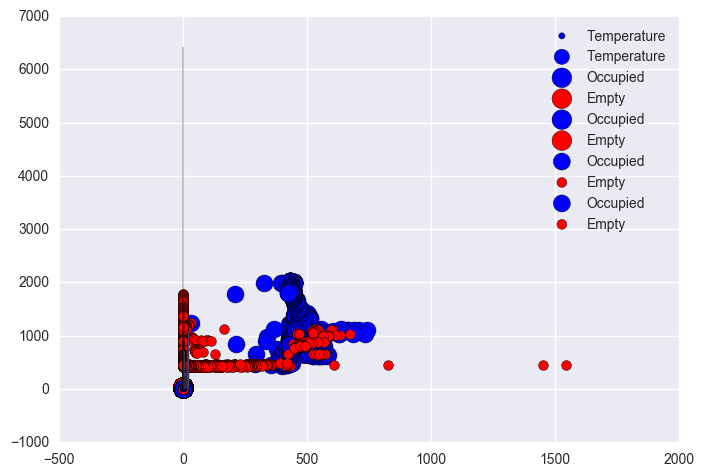

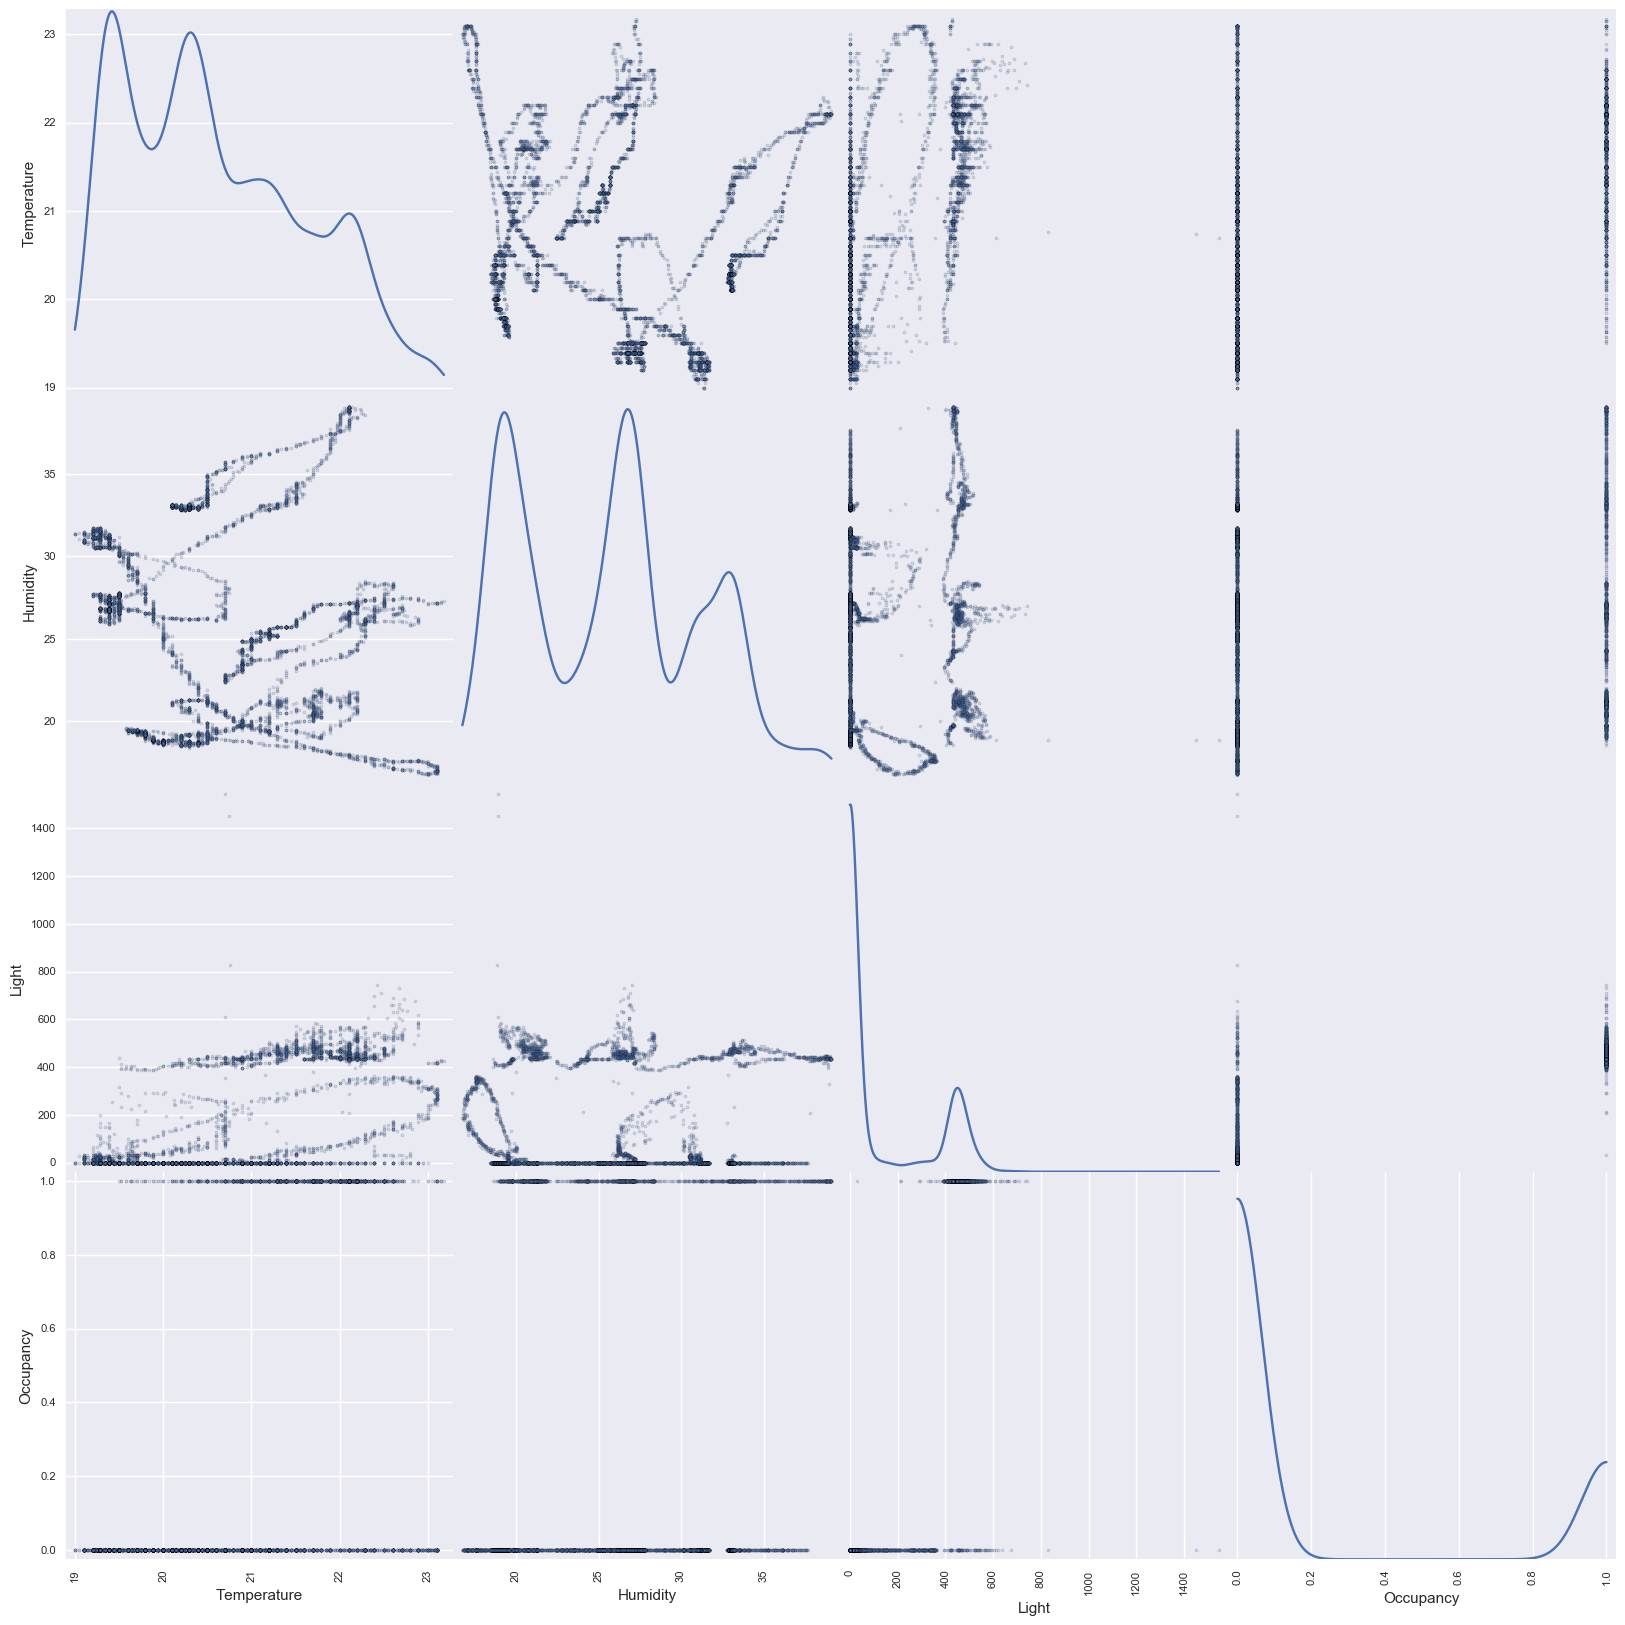

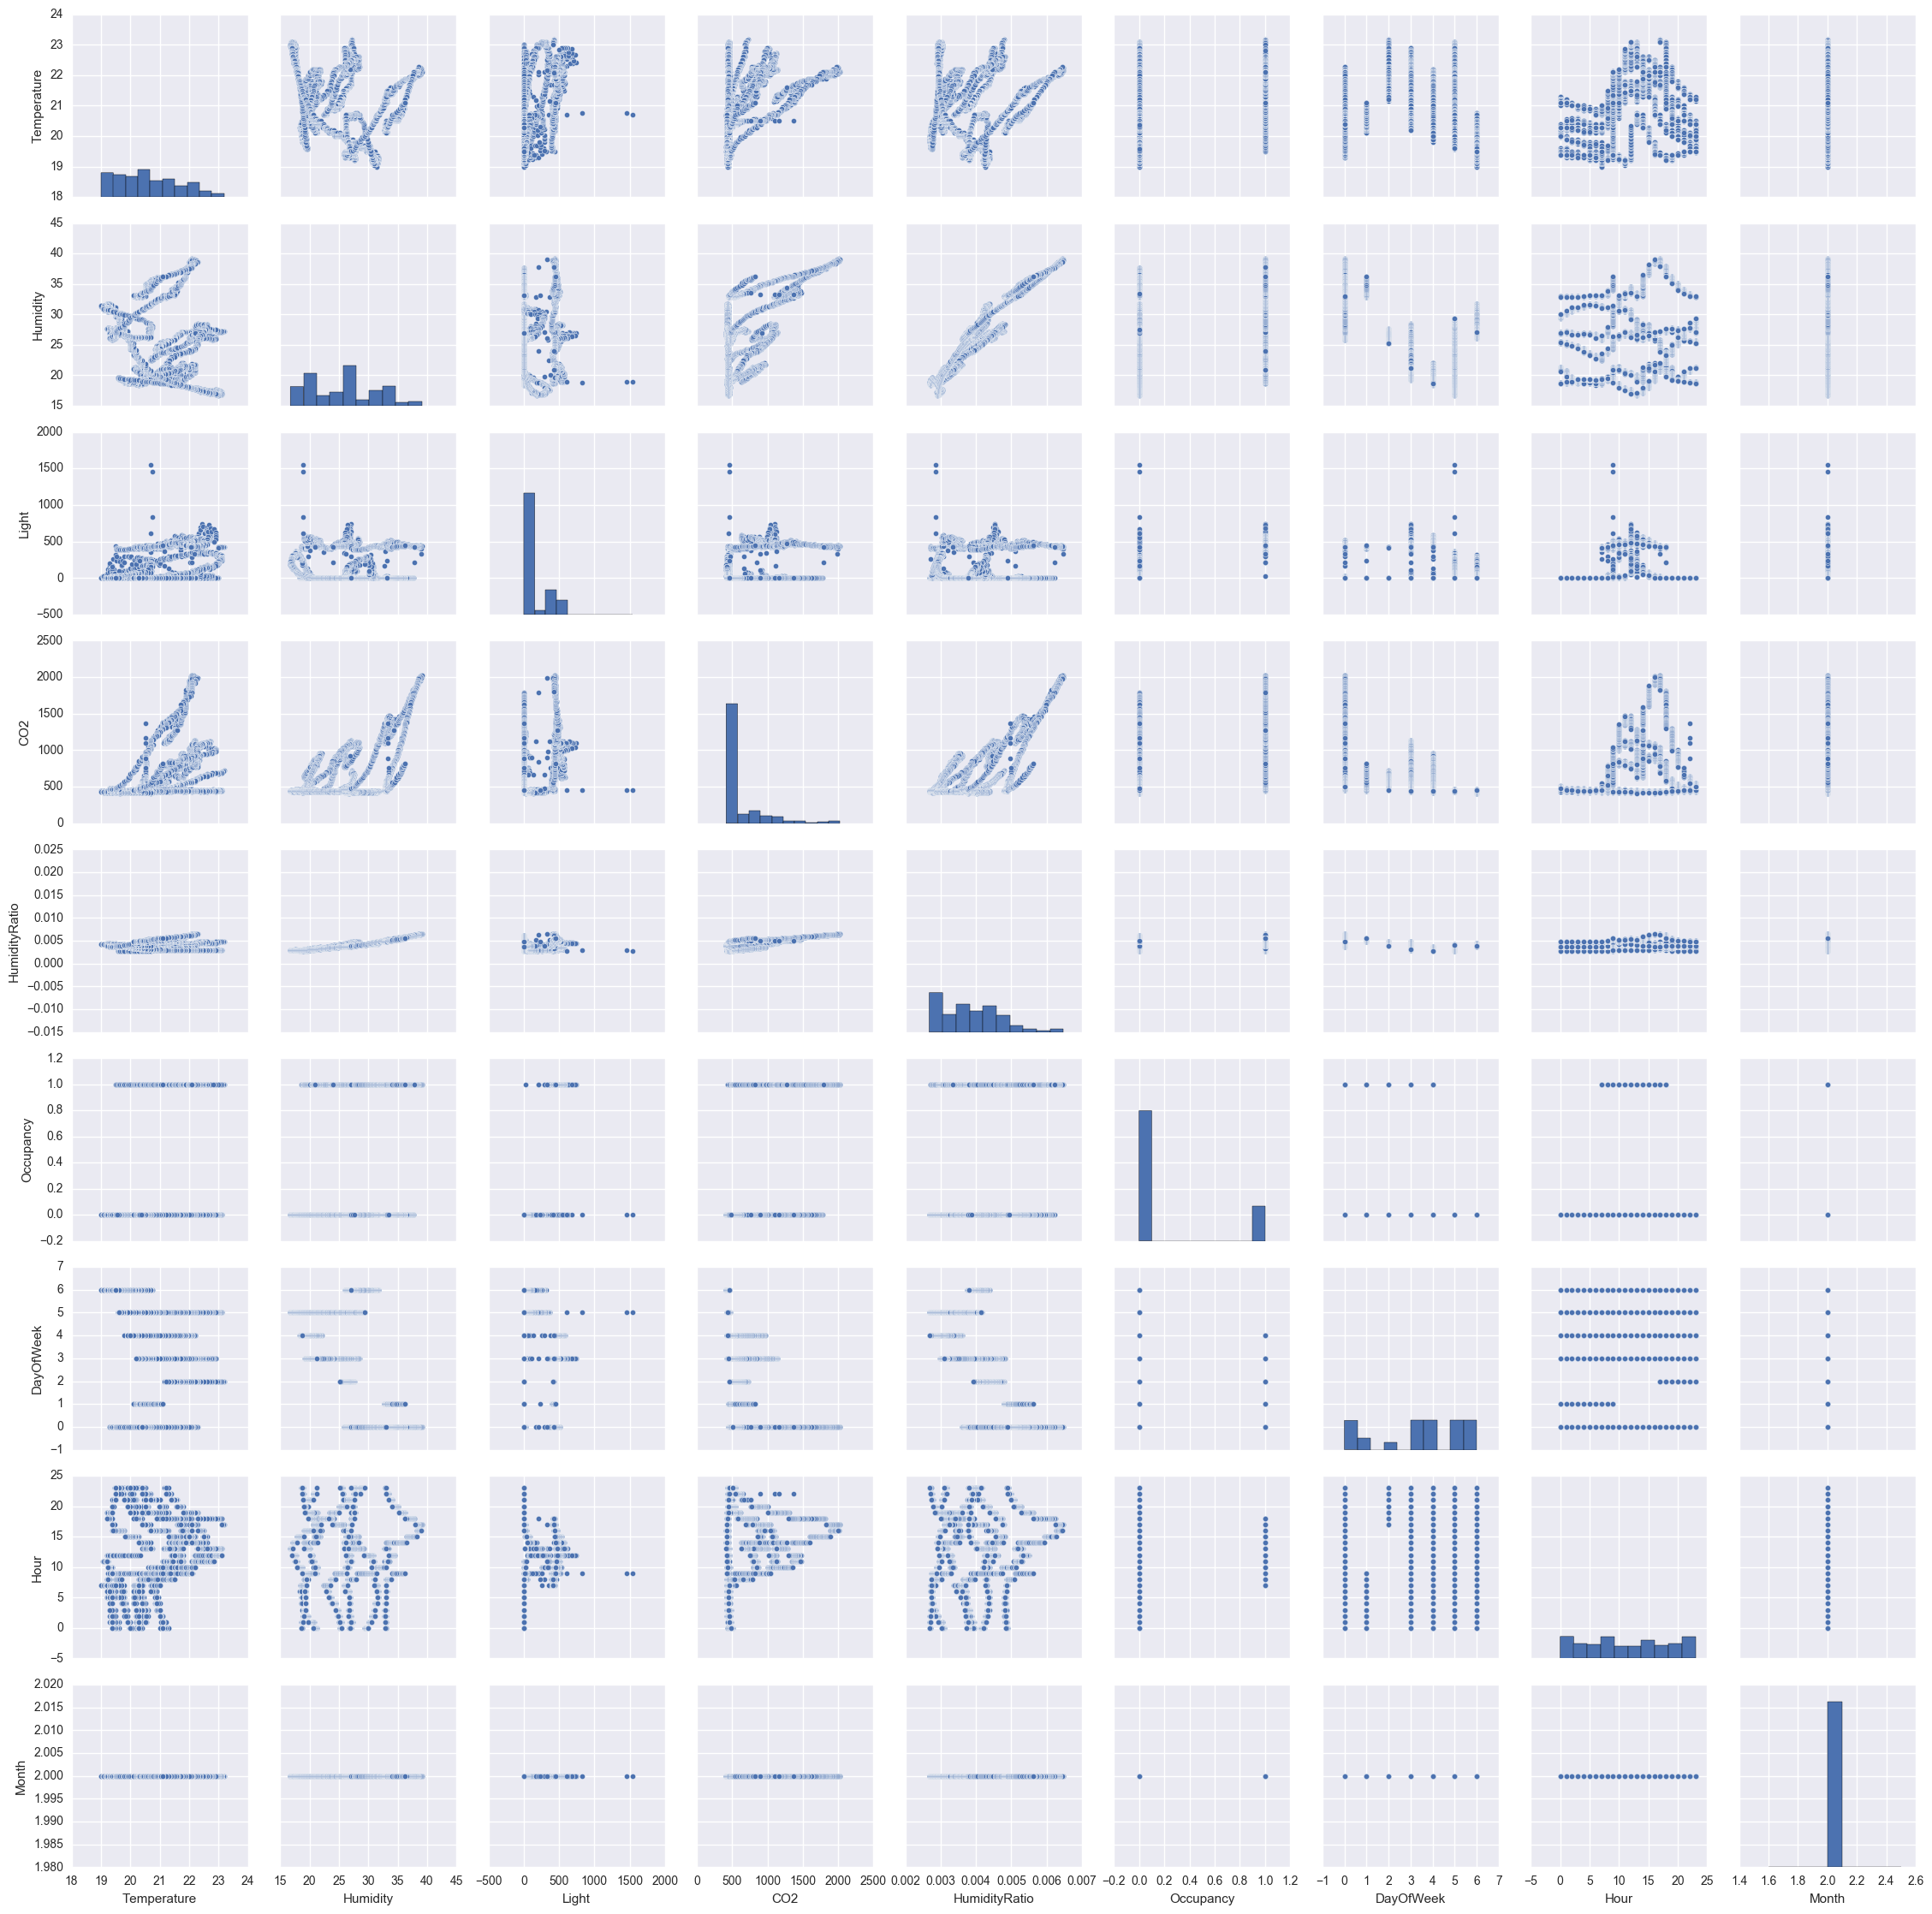

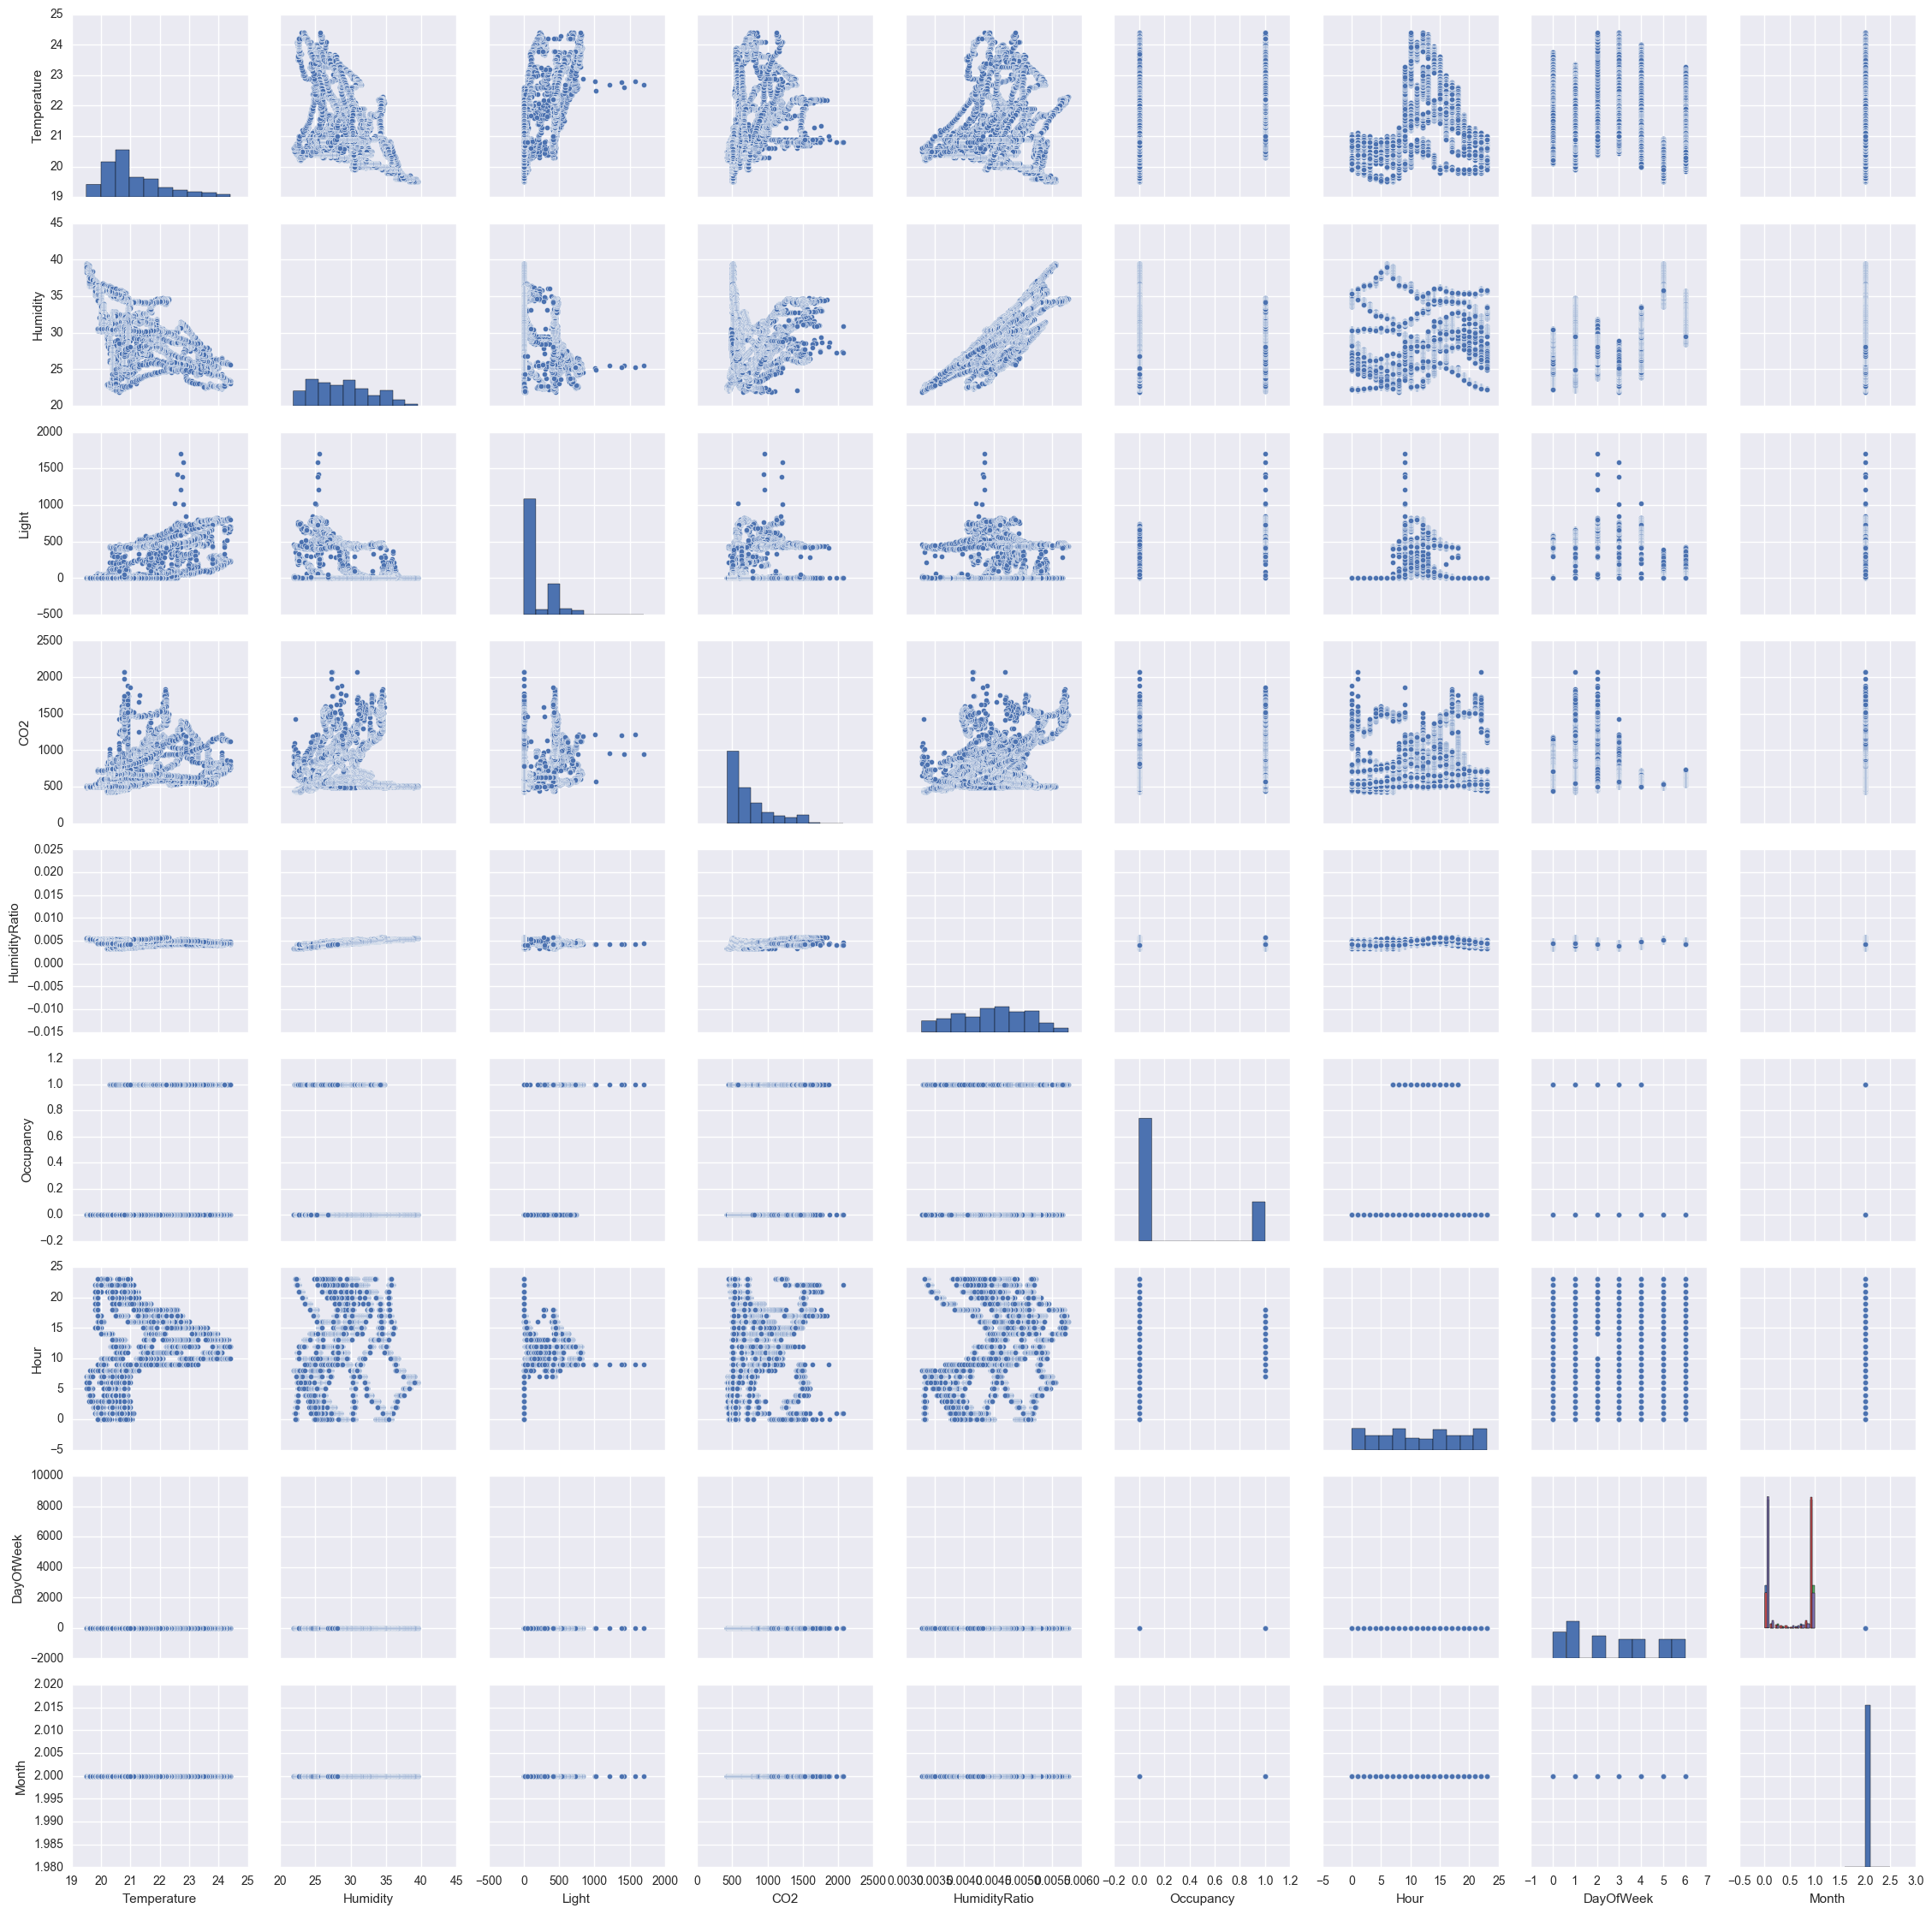

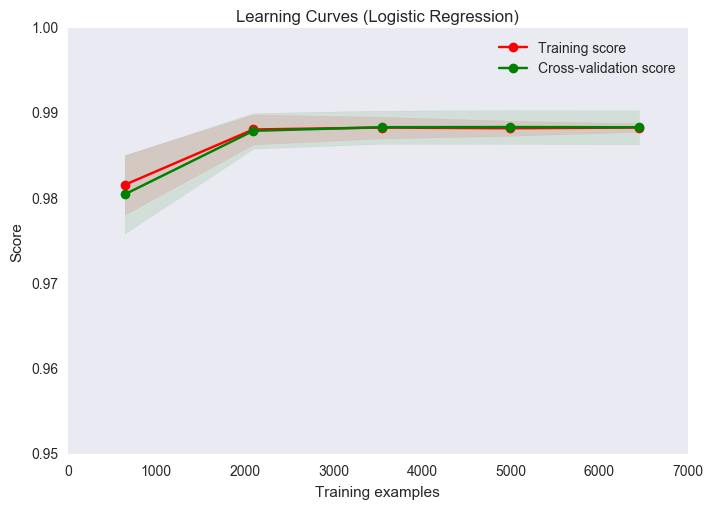

(8061, 8)
(8061, 1)
(8061, 8)
(8061, 1)
(82, 8)
(82, 1)


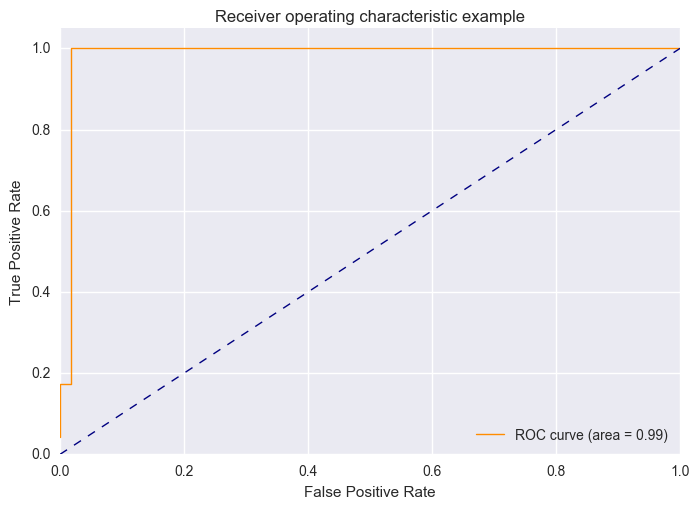

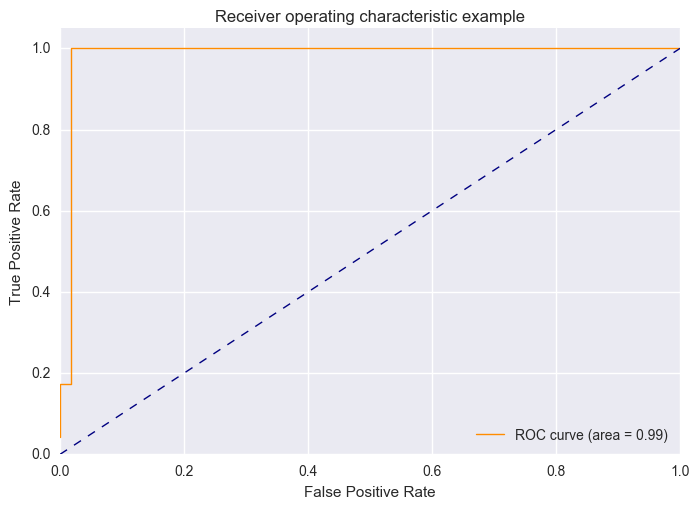

In [58]:
df = func_feat_preprocessing(df)
featurenames = ['Temperature', 'Humidity','Light','CO2','HumidityRatio','DayOfWeek','Hour','Month']

# From training data, split into train and test, with balancing
balanced_df = func_balance_classes(df, featurenames, ['Occupancy'], 'upsampling')
Xtrain, Xtest, Ytrain, Ytest = func_train_test_split(balanced_df,featurenames,['Occupancy'],0.99)
log_reg_balanced = func_build_model(LogisticRegression,0.001,Xtrain,Ytrain) 


# From training data, split into train and test, without balancing
Xtrain, Xtest, Ytrain, Ytest = func_train_test_split(df,featurenames,['Occupancy'],0.99)
log_reg_unbalanced = func_build_model(LogisticRegression,0.001,Xtrain,Ytrain) 
#Y_pred,Y_pred_prob = func_apply_model(log_reg_unbalanced, Xtest)
#func_evaluate_model(Y_pred,Ytest)

# Evaluate on test data
print("test data results:\n")
test_dataframes = [data_test, data_test2]
all_test_dataframe = pd.concat(test_dataframes)

df_test  = func_feat_preprocessing(all_test_dataframe)

print('\n Balanced:')
Y_pred_balanced,Y_pred_prob_balanced = func_apply_model(log_reg_balanced, np.array(df_test[featurenames]))
func_evaluate_model(Y_pred_balanced,np.array(df_test['Occupancy']),'Balanced')
plt.hist(Y_pred_prob_balanced)

print('\n Not Balanced:')
Y_pred,Y_pred_prob = func_apply_model(log_reg_unbalanced, np.array(df_test[featurenames]))
func_evaluate_model(Y_pred,np.array(df_test['Occupancy']),'Not balanced')
plt.hist(Y_pred_prob)



title = "Learning Curves (Logistic Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.

cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = LogisticRegression(C=0.001)
plot_learning_curve(estimator, title, Xtrain, Ytrain, (0.95, 1.00), cv=cv, n_jobs=4)
plt.show()

print(np.shape(Xtrain))
print(np.shape(Ytrain))

#################################################################

param_range_inp=np.array([0.01,0.1,0.2,0.5])
print(np.shape(Xtrain))
print(np.shape(Ytrain))
c, r = Ytrain.shape
Ytrain_reformatted = Ytrain.reshape(c,)
train_scores, valid_scores = validation_curve(LogisticRegression(), Xtrain, Ytrain_reformatted,"C",param_range_inp,cv = 10)

##################################################################
print(np.shape(Xtest))
print(np.shape(Ytest))
plot_binary_ROC_curve(log_reg_balanced,2,Xtest,Ytest)
plot_binary_ROC_curve(log_reg_unbalanced,2,Xtest,Ytest)




In [59]:

print('\n Balanced:')
Y_pred_balanced,Y_pred_prob_balanced = func_apply_model(log_reg_balanced, np.array(df_test[featurenames]))
func_evaluate_model(Y_pred_balanced,np.array(df_test['Occupancy']),'Balanced')
plt.hist(Y_pred_prob_balanced)




 Balanced:
             precision    recall  f1-score   support

          0       1.00      0.98      0.99      9396
          1       0.95      1.00      0.97      3021

avg / total       0.99      0.99      0.99     12417

[[9235  161]
 [   9 3012]]




([array([ 2803.,   273.,    44.,    14.,    39.,    40.,   111.,   293.,
           376.,  8424.]),
  array([ 8424.,   376.,   293.,   111.,    40.,    39.,    14.,    44.,
           273.,  2803.])],
 array([  2.26929586e-13,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 2 Lists of Patches objects>)

In [60]:
print('\n Not Balanced:')
Y_pred,Y_pred_prob = func_apply_model(log_reg_unbalanced, np.array(df_test[featurenames]))
func_evaluate_model(Y_pred,np.array(df_test['Occupancy']),'Not balanced')
plt.hist(Y_pred_prob)


 Not Balanced:
             precision    recall  f1-score   support

          0       1.00      0.99      0.99      9396
          1       0.96      0.99      0.98      3021

avg / total       0.99      0.99      0.99     12417

[[9286  110]
 [  40 2981]]




([array([ 2311.,   300.,   191.,   141.,   148.,    38.,    45.,   150.,
           471.,  8622.]),
  array([ 8622.,   471.,   150.,    45.,    38.,   148.,   141.,   191.,
           300.,  2311.])],
 array([  5.08288966e-11,   1.00000000e-01,   2.00000000e-01,
          3.00000000e-01,   4.00000000e-01,   5.00000000e-01,
          6.00000000e-01,   7.00000000e-01,   8.00000000e-01,
          9.00000000e-01,   1.00000000e+00]),
 <a list of 2 Lists of Patches objects>)

In [61]:
from sklearn.feature_selection import *

rfe_selector = RFE(log_reg_balanced, 5, step=1)
rfe_selector = rfe_selector.fit(Xtrain, Ytrain_reformatted)
print(rfe_selector.support_) 
print(rfe_selector.ranking_)    
print("Optimal number of features :",rfe_selector.n_features_)




[ True  True  True False False  True False  True]
[1 1 1 3 4 1 2 1]
Optimal number of features : 5


In [62]:
kbest_selector = SelectKBest(score_func=mutual_info_classif, k=4)
fit = kbest_selector.fit(Xtrain, Ytrain_reformatted)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(Xtrain)
# summarize selected features
print(features)

[ 0.227  0.189  0.473  0.343  0.251  0.138  0.241  0.   ]
[[  4.690e+02   1.377e+03   5.133e-03   1.100e+01]
 [  4.907e+02   8.183e+02   3.302e-03   1.100e+01]
 [  0.000e+00   4.590e+02   3.809e-03   1.000e+00]
 ..., 
 [  0.000e+00   4.350e+02   3.829e-03   1.900e+01]
 [  2.200e+01   4.168e+02   3.780e-03   1.600e+01]
 [  0.000e+00   4.470e+02   4.819e-03   3.000e+00]]


In [63]:
kbest_selector = SelectKBest(score_func=chi2, k=4)
fit = kbest_selector.fit(Xtrain, Ytrain_reformatted)
# summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(Xtrain)
# summarize selected features
print(features)



[  1.165e+02   1.710e+02   2.107e+06   6.640e+05   1.368e-01   6.565e+02
   2.241e+02   0.000e+00]
[[  4.690e+02   1.377e+03   0.000e+00   1.100e+01]
 [  4.907e+02   8.183e+02   4.000e+00   1.100e+01]
 [  0.000e+00   4.590e+02   0.000e+00   1.000e+00]
 ..., 
 [  0.000e+00   4.350e+02   6.000e+00   1.900e+01]
 [  2.200e+01   4.168e+02   6.000e+00   1.600e+01]
 [  0.000e+00   4.470e+02   1.000e+00   3.000e+00]]


In [64]:
model = SelectFromModel(log_reg_balanced, prefit=True)
print(np.shape(Xtrain))
X_new = model.transform(Xtrain)
print(np.shape(X_new))

(8061, 8)
(8061, 3)


In [65]:
from sklearn.decomposition import PCA
pca = PCA()
fit = pca.fit(Xtrain)
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)
print(fit.explained_variance_ratio_*100)
#print(fit.components_)
print(fit.n_features_)
print(fit.explained_variance_)
#, n_features


Explained Variance: [  8.708e-01   1.287e-01   3.564e-04   1.530e-04   2.103e-05   3.009e-06
   8.369e-15   0.000e+00]
[  8.708e+01   1.287e+01   3.564e-02   1.530e-02   2.103e-03   3.009e-04
   8.369e-13   0.000e+00]
8
[  1.188e+05   1.755e+04   4.861e+01   2.087e+01   2.868e+00   4.105e-01
   1.142e-09   0.000e+00]


In [66]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(Xtrain, Ytrain_reformatted)
# display the relative importance of each attribute
print(model.feature_importances_)
print(model.oob_score)


[ 0.134  0.026  0.345  0.292  0.036  0.052  0.115  0.   ]
False


In [67]:
'''# Create the RFE object and compute a cross-validated score.
sv/c = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)'''

'# Create the RFE object and compute a cross-validated score.\nsv/c = SVC(kernel="linear")\n# The "accuracy" scoring is proportional to the number of correct\n# classifications\nrfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(2),\n              scoring=\'accuracy\')\nrfecv.fit(X, y)\n\nprint("Optimal number of features : %d" % rfecv.n_features_)'

In [68]:
from sklearn.linear_model import LassoCV

clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.00001)
sfm.fit(Xtrain, Ytrain_reformatted)
n_features = sfm.transform(Xtrain).shape[1]
print(n_features)



2


In [69]:
from sklearn.linear_model import RandomizedLasso
randomized_lasso = RandomizedLasso()
randomized_lasso = randomized_lasso.fit(Xtrain, Ytrain_reformatted)
X_new = randomized_lasso.transform(Xtrain)
print(randomized_lasso.get_support())
print(randomized_lasso.all_scores_)
#mask = random_lr.get_support()

[ True  True  True  True  True  True  True False]
[[ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 0.]]


In [70]:
from sklearn.linear_model.randomized_l1 import (RandomizedLasso,
                                                RandomizedLogisticRegression)
randomized_lr = RandomizedLogisticRegression(C=0.5)
randomized_lr.fit(Xtrain, Ytrain_reformatted)
randomized_lr_out = randomized_lr.get_support()
print(randomized_lr_out)

[False False  True  True False False False False]


In [71]:

from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv = RFECV(estimator=svc, step=1, cv=StratifiedKFold(1),
              scoring='accuracy')
rfecv.fit(Xtrain, Ytrain_reformatted)

print("Optimal number of features : %d" % rfecv.n_features_)


# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.